# Logistic regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv('Tumor_Data_Sample.csv')
X = df.iloc[:, 1:-1].values # We are not interested in the first column so we exclude that from X
y = df.iloc[:, -1].values

In [3]:
#df.head()

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## Feature Scaling

In [5]:
# Kom ihåg: man behöver inte göra feature scaling på alla modeller, men ingen modell tar skada av att man gör det!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train.shape

(15, 9)

In [7]:
X_test.shape

(4, 9)

## Training the Logistic Regression model on the Training set

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix and other metrices

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [10]:
# Predicting the test set result
y_pred = classifier.predict(X_test)


In [11]:
# pos_label must be set to 4 and not the default value 1
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred) )
print("Precision:", precision_score(y_test, y_pred, pos_label=4)) 
print("Recall:", recall_score(y_test, y_pred, pos_label=4))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=4))

Accuracy: 0.75
Confusion matrix:
 [[1 1]
 [0 2]]
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8


## Making the ROC and calculating the AUC


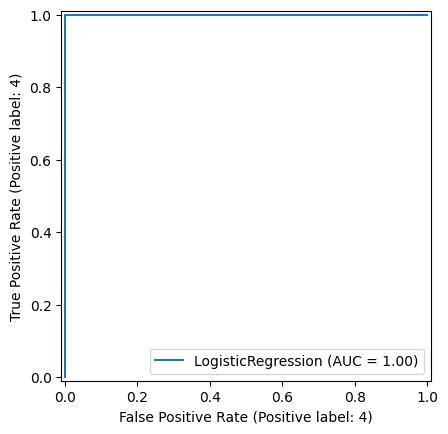

In [12]:
from sklearn.metrics import RocCurveDisplay
classifier_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

In [13]:
#from sklearn.metrics import roc_auc_score
#y_pred2 = classifier.predict_proba(X_test)[:, 1]
#auc = roc_auc_score(y_test, y_pred2)

In [14]:
#print(auc)